In [17]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cross_validation import train_test_split
from sklearn.manifold import TSNE

trainingSet = pd.read_csv('./data/train.csv', index_col=0)
#remove redundant string 'location' from location entries
#trainingSet['location'] = [l.replace('location ', '') for l in trainingSet['location']]
trainingSet['location'] = trainingSet['location'].astype('category')
trainingSet['fault_severity'] = trainingSet['fault_severity'].astype('category')
trainingSet.describe()


,location,fault_severity
count,7381,7381
unique,929,3
top,location 821,0
freq,85,4784


In [18]:
trainingSet.head(5)

,location,fault_severity
id,,
14121,location 118,1
9320,location 91,0
14394,location 152,1
8218,location 931,1
14804,location 120,0


In [19]:
#count the occurences of different events
trainingSet['fault_severity'].value_counts()

0    4784
1    1871
2     726
dtype: int64

In [20]:
eventLocations = trainingSet.groupby('location')
print type(eventLocations)
#eventLocations.head()
dfrd=eventLocations.describe()
print type(dfrd)
dfrd.head(20)

<class 'pandas.core.groupby.DataFrameGroupBy'>
<class 'pandas.core.frame.DataFrame'>


fault_severity
location                            
location 1    count               24
              unique               3
              top                  0
              freq                14
location 10   count                1
              unique               1
              top                  0
              freq                 1
location 100  count               15
              unique               2
              top                  0
              freq                13
location 1000 count                3
              unique               1
              top                  0
              freq                 3
location 1002 count                1
              unique               1
              top                  0
              freq                 1

In [21]:
pd.crosstab(trainingSet.fault_severity, trainingSet.location)

location,location 1,location 10,location 100,location 1000,location 1002,location 1005,location 1006,location 1007,location 1008,location 1009,...,location 987,location 989,location 99,location 990,location 991,location 994,location 995,location 996,location 998,location 999
fault_severity,,,,,,,,,,,,,,,,,,,,,
0,14,1,13,3,1,1,3,16,34,4,...,1,3,2,3,0,5,4,1,4,3
1,8,0,2,0,0,0,0,3,21,0,...,0,11,0,3,1,0,14,3,6,3
2,2,0,0,0,0,0,0,0,16,0,...,0,2,0,0,2,0,22,0,1,0


In [22]:
#read all the data and remove redundant strings
eventType = pd.read_csv('./data/event_type.csv', index_col=0)
#eventType['event_type'] = [l.replace('event_type ', '') for l in eventType['event_type']]
severityType = pd.read_csv('./data/severity_type.csv', index_col=0)
#severityType['severity_type'] = [l.replace('severity_type ', '') for l in severityType['severity_type']]
logFeature = pd.read_csv('./data/log_feature.csv', index_col=0)
#logFeature['log_feature'] = [l.replace('feature ', '') for l in logFeature['log_feature']]
resourceType = pd.read_csv('./data/resource_type.csv', index_col=0)
#resourceType['resource_type'] = [l.replace('resource_type ', '') for l in resourceType['resource_type']]
#merge all tables
result = trainingSet.join(eventType).join(severityType).join(resourceType).join(logFeature)
#set appropriate data types for columns
categoryColumns = ['location', 'fault_severity', 'event_type', 'severity_type', 'resource_type', 'log_feature']
for column in categoryColumns:
    result[column] = result[column].astype('category')
result.head()

,location,fault_severity,event_type,severity_type,resource_type,log_feature,volume
id,,,,,,,
1,location 601,1,event_type 11,severity_type 1,resource_type 8,feature 68,2
1,location 601,1,event_type 11,severity_type 1,resource_type 8,feature 345,2
1,location 601,1,event_type 11,severity_type 1,resource_type 8,feature 179,1
1,location 601,1,event_type 11,severity_type 1,resource_type 6,feature 68,2
1,location 601,1,event_type 11,severity_type 1,resource_type 6,feature 345,2


In [23]:
result[categoryColumns].describe()

,location,fault_severity,event_type,severity_type,resource_type,log_feature
count,61839,61839,61839,61839,61839,61839
unique,929,3,49,5,10,331
top,location 794,0,event_type 11,severity_type 1,resource_type 2,feature 312
freq,1425,36597,13125,36571,31746,4534


In [24]:
result['volume'].describe()

count    61839.000000
mean         8.390336
std         22.902491
min          1.000000
25%          1.000000
50%          2.000000
75%          6.000000
max        877.000000
Name: volume, dtype: float64

In [25]:
event_type_groupby = result.groupby('event_type')
event_type_groupby.head(5)

,location,fault_severity,event_type,severity_type,resource_type,log_feature,volume
id,,,,,,,
1,location 601,1,event_type 11,severity_type 1,resource_type 8,feature 68,2
1,location 601,1,event_type 11,severity_type 1,resource_type 8,feature 345,2
1,location 601,1,event_type 11,severity_type 1,resource_type 8,feature 179,1
1,location 601,1,event_type 11,severity_type 1,resource_type 6,feature 68,2
1,location 601,1,event_type 11,severity_type 1,resource_type 6,feature 345,2
1,location 601,1,event_type 13,severity_type 1,resource_type 8,feature 68,2
1,location 601,1,event_type 13,severity_type 1,resource_type 8,feature 345,2
1,location 601,1,event_type 13,severity_type 1,resource_type 8,feature 179,1
1,location 601,1,event_type 13,severity_type 1,resource_type 6,feature 68,2


In [26]:
#df_norm = (df - df.mean()) / (df.max() - df.min())
volume_norm = (result.volume - result.volume.mean())/(result.volume.max() - result.volume.min())
volume_norm.head()

id
1    -0.007295
1    -0.007295
1    -0.008436
1    -0.007295
1    -0.007295
Name: volume, dtype: float64

In [27]:
data_vectorized = result['fault_severity']
columns = ['location', 'event_type', 'severity_type', 'resource_type', 'log_feature']
#columns = ['event_type', 'severity_type']
vectorizedLists = [pd.get_dummies(result[item]) for item in columns]
df_X = pd.concat(vectorizedLists, axis=1)
df_X['volume'] = volume_norm
df_X.head(5)

,location 1,location 10,location 100,location 1000,location 1002,location 1005,location 1006,location 1007,location 1008,location 1009,...,feature 90,feature 91,feature 92,feature 94,feature 95,feature 96,feature 97,feature 98,feature 99,volume
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.007295
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.007295
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.008436
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.007295
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.007295


In [28]:
X = df_X.as_matrix()
y = result.as_matrix(['fault_severity'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

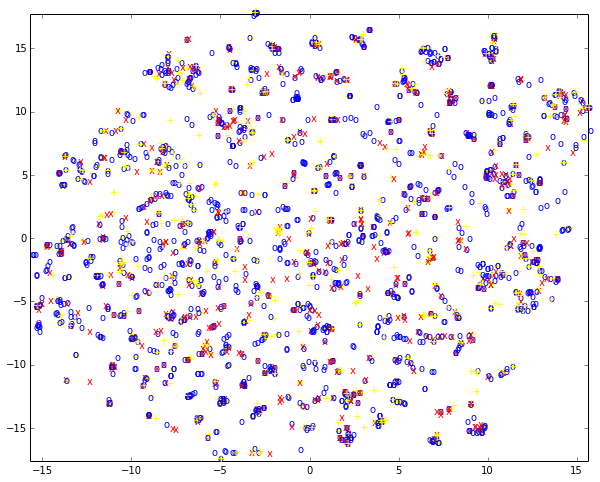

In [31]:
modelTSNE = TSNE(n_components=2, random_state=0)
X_2d = modelTSNE.fit_transform(X_test)
colors = ['blue', 'yellow', 'red']
signs = ['o', '+', 'x']
for i in range(len(y_test)):
    plt.text(X_2d[i,0], X_2d[i,1], signs[int(y[i])], color=colors[int(y[i])])

plt.xlim((np.min(X_2d[:,0]), np.max(X_2d[:,0])))
plt.ylim((np.min(X_2d[:,1]), np.max(X_2d[:,1])))

matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plt.show()


In [32]:
#quick existing model test
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils

nb_classes = 3
batch_size = 128
nb_epoch = 20

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

model = Sequential()
model.add(Dense(512, input_shape=(1325,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

rms = RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=rms)

model.fit(X_train, Y_train,
          batch_size=batch_size, nb_epoch=nb_epoch,
          show_accuracy=True, verbose=2,
          validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test,
                       show_accuracy=True, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

(58747, 'train samples')
(3092, 'test samples')
Train on 58747 samples, validate on 3092 samples
Epoch 1/20
1s - loss: 0.9433 - acc: 0.5911 - val_loss: 0.9364 - val_acc: 0.5954
Epoch 2/20
1s - loss: 0.9398 - acc: 0.5916 - val_loss: 0.9350 - val_acc: 0.5954
Epoch 3/20
1s - loss: 0.9381 - acc: 0.5916 - val_loss: 0.9326 - val_acc: 0.5954
Epoch 4/20
1s - loss: 0.9276 - acc: 0.5916 - val_loss: 0.9093 - val_acc: 0.5954
Epoch 5/20
1s - loss: 0.8722 - acc: 0.5914 - val_loss: 0.8334 - val_acc: 0.5954
Epoch 6/20
1s - loss: 0.8330 - acc: 0.5880 - val_loss: 0.8129 - val_acc: 0.5954
Epoch 7/20
1s - loss: 0.8209 - acc: 0.5905 - val_loss: 0.8304 - val_acc: 0.5954
Epoch 8/20
1s - loss: 0.8131 - acc: 0.5902 - val_loss: 0.7940 - val_acc: 0.5899
Epoch 9/20
1s - loss: 0.8044 - acc: 0.5926 - val_loss: 0.7831 - val_acc: 0.5993
Epoch 10/20
1s - loss: 0.7933 - acc: 0.6019 - val_loss: 0.7742 - val_acc: 0.6138
Epoch 11/20
1s - loss: 0.7828 - acc: 0.6109 - val_loss: 0.7596 - val_acc: 0.6358
Epoch 12/20
1s - loss

Using gpu device 0: GeForce GTX 980 (CNMeM is disabled)
